# <center> <font color = red> Advanced Recommendation System for Netflix (Simulated Data) </center>

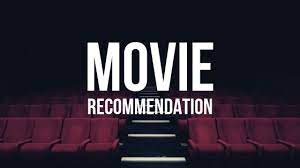


# <center> <font color = red> **NETFLIX** </center>

**Netflix** is a global entertainment company that began in 1997 as a DVD rental service by mail. Founded by **Reed Hastings** and **Marc Randolph** in California, the company revolutionized home entertainment by introducing a subscription-based model with no late fees. In 2007, Netflix made a pivotal shift by launching its **streaming service**, allowing users to instantly watch movies and TV shows online. This marked the beginning of its transformation into a data-driven tech and **content powerhouse.**

Today, Netflix operates in over 190 countries, offering a vast library of films, documentaries, series, and critically acclaimed originals. With over 230 million paid subscribers, Netflix uses advanced machine learning algorithms to personalize content recommendations, improve user experience, and retain engagement. Its recommendation system is a core business engine, responsible for driving over 80% of the content viewed on the platform—making it a prime example of data science at scale.

<img src = "https://raw.githubusercontent.com/insaid2018/Term-4/master/images/rec_netflix.png">

# **BUSINESS PROBLEM**

With an ever-expanding library of content and millions of diverse users, Netflix faces the challenge of ensuring that each user quickly discovers content that aligns with their **unique preferences.** The goal is to **develop an intelligent recommendation system that accurately predicts and suggests personalized content to enhance user satisfaction, increase watch time, and reduce subscriber churn.**

## Libraries and Setup

In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Acquisition and Defination

In [314]:
# Reading ratings file
ratings = pd.read_csv('ratings.csv')

In [315]:
# Reading movies file
movies = pd.read_csv('movies.csv')

In [316]:
#Rating data Preview
ratings = ratings.head(100000)
ratings

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
99995,702,1373,3.0,1095142579
99996,702,1374,2.5,1095136686
99997,702,1377,1.5,1095141779
99998,702,1378,1.5,1095139088


In [317]:
#Movies data Preview
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


## About the Data

### **ratings**
<table >
  <tr>
    <th>ID</th>
    <th>Feature</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>1</td>
    <td>userid</td>
    <td>Unique ID of every Individuals</td>
  </tr>
  <tr>
    <td>2</td>
    <td>movieid</td>
    <td>unique ID for each movie present</td>
  </tr>
    <tr>
    <td>3</td>
    <td>rating</td>
    <td>Rating given to movie by user, on scale of 0-5</td>
  </tr>
    <tr>
    <td>4</td>
    <td>timestamp</td>
    <td>timestamp of the movie watched</td>
  </tr>
</table>


### **movies**
<table >
  <tr>
    <th>ID</th>
    <th>Feature</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>1</td>
    <td>movieid</td>
    <td>unique ID for each movie present</td>
  </tr>
  <tr>
    <td>2</td>
    <td>title</td>
    <td>title of the movie</td>
  </tr>
    <tr>
    <td>3</td>
    <td>genre</td>
    <td>genre of the movie [Horror, Comedy, Drama etc.]</td>
</table>


# <center> **Data Handling**</center>

## Data Pre-Profiling and Exploration

In [323]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100000 non-null  int64  
 1   movieId    100000 non-null  int64  
 2   rating     100000 non-null  float64
 3   timestamp  100000 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [324]:
ratings.isnull().sum()  #checking null values

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [325]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [326]:
movies.isnull().sum()  #checking null values

movieId    0
title      0
genres     0
dtype: int64

In [327]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,362.830400,8572.465800,3.507605,1.092640e+09
std,196.802903,19056.086006,1.062928,1.613930e+08
min,1.000000,1.000000,0.500000,8.292350e+08
25%,198.000000,858.000000,3.000000,9.624846e+08
50%,370.000000,2109.000000,3.500000,1.089803e+09
75%,536.000000,4446.000000,4.000000,1.210656e+09
max,702.000000,128594.000000,5.000000,1.427696e+09


In [328]:
movies.describe()

,movieId
count,27278.000000
mean,59855.480570
std,44429.314697
min,1.000000
25%,6931.250000
50%,68068.000000
75%,100293.250000
max,131262.000000


In [329]:
#droping the irrelavant column
ratings = ratings.drop('timestamp', axis = 1)

## Data PreProcessing

In [331]:
#creating new columns of every genre with multihot encoding

genre_list = list(set(movies['genres'].str.split('|').sum()))
for col in genre_list:
    movies.loc[movies['genres'].str.find(col) != -1, col] = 1


In [332]:
movies.fillna(0, inplace = True)

In [333]:
movies['year'] = movies['title'].str[-5:-1] # gives 'year'
movies['title'] = movies['title'].str[:-6]  #removing year from column 'Title'


In [334]:
movies['year'] = pd.to_numeric(movies['year'], errors='coerce').fillna(0).astype(int)  #changing the datatype of year

In [335]:
movies.drop(columns = ['genres','movieId'], inplace = True)  #drop irrelavant columns

In [336]:
movies.set_index('title', inplace = True)


In [337]:
movies

,Comedy,Action,Sci-Fi,Children,Adventure,Animation,War,Mystery,Thriller,Western,...,Drama,Horror,Documentary,Crime,(no genres listed),Romance,Fantasy,IMAX,Musical,year
title,,,,,,,,,,,,,,,,,,,,,
Toy Story,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1995
Jumanji,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1995
Grumpier Old Men,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1995
Waiting to Exhale,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1995
Father of the Bride Part II,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kein Bund für's Leben,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007
"Feuer, Eis & Dosenbier",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2002
The Pirates,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014


Now lets take a peak into the content of each file to understand them better.

### Ratings Dataset

In [339]:
ratings

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
...,...,...,...
99995,702,1373,3.0
99996,702,1374,2.5
99997,702,1377,1.5
99998,702,1378,1.5


In [340]:
rating = ratings.pivot_table(columns = 'movieId' , index = 'userId', values = 'rating').fillna(0).astype('int')


In [341]:
rating

movieId,1,2,3,4,5,6,7,8,9,10,...,117511,117590,118354,118696,118900,118997,119141,125916,128488,128594
userId,,,,,,,,,,,,,,,,,,,,,
1,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,3,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
5,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
699,4,0,0,0,2,4,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
700,4,0,0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##  Collaborative Filtering Recommendation Model

### Implementation
we will use the file **ratings.csv** first as it contains User ID, Movie IDs and Ratings. These three elements are all we need for determining the similarity of the users based on their ratings for a particular movie.

First lets do some quick data processing:

In [365]:
rating.replace({0:np.nan}, inplace = True)

In [367]:
rating

movieId,1,2,3,4,5,6,7,8,9,10,...,117511,117590,118354,118696,118900,118997,119141,125916,128488,128594
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,4.0,NaN,NaN,NaN,2.0,4.0,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
700,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [369]:
rating = rating.T
rating

userId,1,2,3,4,5,6,7,8,9,10,...,693,694,695,696,697,698,699,700,701,702
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,4.0,NaN,NaN,5.0,NaN,4.0,NaN,4.0,...,NaN,4.0,NaN,NaN,NaN,NaN,4.0,4.0,NaN,3.0
2,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
3,NaN,4.0,NaN,NaN,NaN,3.0,3.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [371]:
for col in rating.columns:
    rating[col] = rating[col] - rating[col].mean()
rating = rating.fillna(0)
rating = rating.T
rating

movieId,1,2,3,4,5,6,7,8,9,10,...,117511,117590,118354,118696,118900,118997,119141,125916,128488,128594
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,-0.525714,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.122995,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.000000,-0.571429,0.000000,0.0,0.0,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,-1.272727,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,0.000000,0.517241,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
699,0.443333,0.000000,0.0,0.0,-1.556667,0.443333,-0.556667,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
700,0.814570,0.000000,0.0,0.0,0.000000,0.814570,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [284]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(rating , dense_output = True)


(702, 702)
(702, 8227)


In [389]:
similarity_df = pd.DataFrame(similarity, columns = rating.index , index = rating.index)
similarity_df

userId,1,2,3,4,5,6,7,8,9,10,...,693,694,695,696,697,698,699,700,701,702
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.014273,0.053775,0.048366,0.051500,-0.000348,0.023348,-0.013926,-0.002037,0.058483,...,-0.003060,0.000088,-0.034535,-0.003282,-0.004756,-0.063239,0.002777,0.009789,0.019608,0.018002
2,0.014273,1.000000,0.064919,0.025317,0.052187,0.035336,0.088485,0.039048,0.000000,0.013856,...,0.000000,0.016326,0.006225,0.034668,0.007099,0.014299,0.006883,0.052222,0.000000,0.036169
3,0.053775,0.064919,1.000000,0.015300,-0.008025,-0.024011,0.012590,0.012737,0.021772,0.026654,...,0.008826,-0.015707,-0.002542,-0.006625,0.046693,-0.000613,0.053887,0.046577,-0.008890,0.063647
4,0.048366,0.025317,0.015300,1.000000,0.044112,-0.050693,0.021210,0.158575,0.014856,-0.025345,...,0.004951,0.005621,0.013396,0.007460,0.013494,0.047046,0.002754,-0.000548,-0.006569,-0.012889
5,0.051500,0.052187,-0.008025,0.044112,1.000000,0.050837,0.080559,-0.004609,0.000000,0.015948,...,-0.046185,0.060922,0.027166,0.019951,0.006809,-0.005395,0.011796,0.006434,-0.006002,0.050775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,-0.063239,0.014299,-0.000613,0.047046,-0.005395,0.000000,0.028096,-0.069317,0.016783,-0.028631,...,0.145983,-0.007746,0.015132,0.021402,0.025137,1.000000,-0.029468,-0.055444,0.028200,-0.059705
699,0.002777,0.006883,0.053887,0.002754,0.011796,0.002756,0.056976,0.046996,0.025897,0.020285,...,0.025506,0.035678,0.102222,-0.003554,0.071142,-0.029468,1.000000,-0.004525,-0.003572,0.099052
700,0.009789,0.052222,0.046577,-0.000548,0.006434,0.026949,0.022484,-0.022474,0.039391,0.002750,...,0.008852,-0.006934,0.007773,-0.027117,0.010595,-0.055444,-0.004525,1.000000,0.018758,0.025457


## Finding the similar users

In [383]:
def get_similar_users(user_ids, n=5):
    similar_users = similarity_df[user_ids].sort_values(ascending=False).drop(user_ids, axis = 0).head(n)
    return similar_users.index.tolist()


## Get movies rated by similar users but not by the target user

In [379]:
def get_recommendations(user_id, top_n_users=5):
    similar_users = get_similar_users(user_id, top_n_users)
    
    # Movies rated by similar users
    similar_users_ratings = rating.loc[similar_users]
    
    # Average ratings of similar users (mean over users)
    mean_ratings = similar_users_ratings.mean(axis=0)
    
    # Movies the target user has already rated
    user_movies = rating.loc[user_id]
    already_rated = user_movies[user_movies > 0].index

    # Drop already rated movies
    recommendations = mean_ratings.drop(already_rated)
    
    # Return top 10 recommendations
    return recommendations.sort_values(ascending=False).head(10)


In [381]:
get_recommendations(5)

movieId
597    0.656720
527    0.508333
587    0.508333
539    0.456720
32     0.364103
29     0.364103
805    0.348387
494    0.348387
647    0.348387
47     0.308333
dtype: float64

## Singular Vector Decoposition

To perform **Singular Value Decomposition** (SVD), we can leverage functions available in both SciPy and NumPy. For this project, we’ll use scipy.sparse.linalg.svds because it offers a key advantage: it allows us to directly specify the number of latent factors (k) to extract during decomposition. This enables us to efficiently approximate the original user-item ratings matrix without requiring post-decomposition truncation, making the process both computationally optimized and tailored to our recommendation system's needs.



In [403]:
from scipy.sparse.linalg import svds

In [411]:
first , second , third = svds(rating.astype('float').values , k = 10)

In [413]:
print(first.shape)
print(second.shape)
print(third.shape)

(702, 10)
(10,)
(10, 8227)


In [415]:
sigma = np.diag(second)


In [417]:
approx_ratings = np.dot(np.dot(first, sigma), third)
predicted_ratings_df = pd.DataFrame(approx_ratings, index=rating.index, columns=rating.columns)


In [419]:
def recommend_movies(user_id, num_recommendations=5):
    # Get all movies the user has rated
    user_seen = rating.loc[user_id][rating.loc[user_id] > 0].index

    # Get predictions for the user, sorted by predicted rating
    user_predictions = predicted_ratings_df.loc[user_id].sort_values(ascending=False)

    # Recommend unseen movies
    recommendations = user_predictions[~user_predictions.index.isin(user_seen)].head(num_recommendations)
    return recommendations


## Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
# Reconstruct predicted ratings
predicted_ratings = np.dot(np.dot(first, np.diag(second)), third)

# Only consider actual ratings > 0 (i.e., user has rated the movie)
mask = rating.values > 0

# Get true and predicted values where ratings exist
true_values = rating.values[mask]
pred_values = predicted_ratings[mask]


In [ ]:
rmse = np.sqrt(mean_squared_error(true_values, pred_values))
print("RMSE:", rmse)


By doing this we can now also evaluate the model performance.  RMSE of training of model is a metric which measure how much the signal and the noise is explained by the model. I noticed that my RMSE is quite big. I suppose I might have overfitted the training data.


# <center> **CONCLUSION**</center>

**In this project, we built a movie recommendation system using Netflix-like user ratings data. By applying matrix factorization via Singular Value Decomposition (SVD), we were able to extract latent features from the sparse user-item rating matrix and predict user preferences for unseen movies. The model was evaluated using RMSE to measure prediction accuracy, demonstrating its ability to capture user behavior and movie similarities effectively. This system provides personalized recommendations, which can significantly enhance user experience on streaming platforms by helping users discover content aligned with their tastes.**